# Indian (Import & Export) Trade Analysis
#By- Aarush Kumar
#Dated: July 19,2021

In [1]:
from IPython.display import Image
Image(url='https://www.uschamber.com/sites/default/files/articles/images/023394_uschamber-donohue-commentary-trade-war-china-usa_atf.gif')

ERROR! Session/line number was not unique in database. History logging moved to new session 320


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import squarify #TreeMap
# import graph objects as "go"
import plotly.graph_objs as go
%matplotlib inline

In [3]:
data_import = pd.read_csv("/home/aarush100616/Downloads/Projects/Indian Import & Export Analysis/2018-2010_import.csv")
data_export = pd.read_csv("/home/aarush100616/Downloads/Projects/Indian Import & Export Analysis/2018-2010_export.csv")

In [4]:
data_export

HSCode                                          Commodity  value  \
0            2                        MEAT AND EDIBLE MEAT OFFAL.   0.18   
1            3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...   0.00   
2            4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...  12.48   
3            6  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...   0.00   
4            7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   1.89   
...        ...                                                ...    ...   
137018      95  TOYS, GAMES AND SPORTS REQUISITES; PARTS AND A...   0.03   
137019      96               MISCELLANEOUS MANUFACTURED ARTICLES.   0.45   
137020      97      WORKS OF ART COLLECTORS' PIECES AND ANTIQUES.   0.00   
137021      98                  PROJECT GOODS; SOME SPECIAL USES.   0.00   
137022      99                               MISCELLANEOUS GOODS.   0.07   

                country  year  
0       AFGHANISTAN TIS  2018  
1       AFGHANISTAN TIS  2018  
2       AFGHANISTAN TIS  2018  
3       AFGHANISTAN TIS  2018  
4       AFGHANISTAN TIS  2018  
...                 ...   ...  
137018         ZIMBABWE  2010  
137019         ZIMBABWE  2010  
137020         ZIMBABWE  2010  
137021         ZIMBABWE  2010  
137022         ZIMBABWE  2010  

[137023 rows x 5 columns]

In [5]:
data_import

HSCode                                          Commodity   value  \
0           5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...    0.00   
1           7    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   12.38   
2           8  EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...  268.60   
3           9                      COFFEE, TEA, MATE AND SPICES.   35.48   
4          11  PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...     NaN   
...       ...                                                ...     ...   
76119      81      OTHER BASE METALS; CERMETS; ARTICLES THEREOF.    0.14   
76120      82  TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...    0.00   
76121      84  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...     NaN   
76122      85  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...     NaN   
76123      99                               MISCELLANEOUS GOODS.     NaN   

               country  year  
0      AFGHANISTAN TIS  2018  
1      AFGHANISTAN TIS  2018  
2      AFGHANISTAN TIS  2018  
3      AFGHANISTAN TIS  2018  
4      AFGHANISTAN TIS  2018  
...                ...   ...  
76119         ZIMBABWE  2010  
76120         ZIMBABWE  2010  
76121         ZIMBABWE  2010  
76122         ZIMBABWE  2010  
76123         ZIMBABWE  2010  

[76124 rows x 5 columns]

In [6]:
data_export.describe()

HSCode          value           year
count  137023.000000  122985.000000  137023.000000
mean       51.330302      21.567829    2014.056304
std        28.018026     229.701279       2.580160
min         1.000000       0.000000    2010.000000
25%        28.000000       0.030000    2012.000000
50%        52.000000       0.360000    2014.000000
75%        74.000000       3.770000    2016.000000
max        99.000000   19805.170000    2018.000000

In [7]:
data_import.describe()

HSCode         value          year
count  76124.000000  64536.000000  76124.000000
mean      53.905023     62.361425   2014.018299
std       27.546852    666.327177      2.579385
min        1.000000      0.000000   2010.000000
25%       30.000000      0.030000   2012.000000
50%       54.000000      0.370000   2014.000000
75%       78.000000      4.780000   2016.000000
max       99.000000  32781.570000   2018.000000

In [8]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     137023 non-null  int64  
 1   Commodity  137023 non-null  object 
 2   value      122985 non-null  float64
 3   country    137023 non-null  object 
 4   year       137023 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [9]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76124 entries, 0 to 76123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     76124 non-null  int64  
 1   Commodity  76124 non-null  object 
 2   value      64536 non-null  float64
 3   country    76124 non-null  object 
 4   year       76124 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [10]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        11588
country          0
year             0
dtype: int64

In [11]:
data_export.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [12]:
data_import[data_import.value==0].head(5)

HSCode                                          Commodity  value  \
0        5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...    0.0   
9       27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...    0.0   
11      41  RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND ...    0.0   
20      81      OTHER BASE METALS; CERMETS; ARTICLES THEREOF.    0.0   
22      84  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...    0.0   

            country  year  
0   AFGHANISTAN TIS  2018  
9   AFGHANISTAN TIS  2018  
11  AFGHANISTAN TIS  2018  
20  AFGHANISTAN TIS  2018  
22  AFGHANISTAN TIS  2018

In [13]:
data_import[data_import.country == "UNSPECIFIED"].head(5)

HSCode                                          Commodity  value  \
8263       1                                      LIVE ANIMALS.    NaN   
8264       2                        MEAT AND EDIBLE MEAT OFFAL.    NaN   
8265       3  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...    3.1   
8266       4  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...    0.1   
8267       5  PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...    NaN   

          country  year  
8263  UNSPECIFIED  2018  
8264  UNSPECIFIED  2018  
8265  UNSPECIFIED  2018  
8266  UNSPECIFIED  2018  
8267  UNSPECIFIED  2018

In [14]:
print("Duplicate imports : "+str(data_import.duplicated().sum()))
print("Duplicate exports : "+str(data_export.duplicated().sum()))

Duplicate imports : 1031
Duplicate exports : 0


In [15]:
def cleanup(data_df):
    #setting country UNSPECIFIED to nan
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    #ignoring where import value is 0 . 
    data_df = data_df[data_df.value!=0]
    data_df.dropna(inplace=True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep="first",inplace=True)
    return data_df

In [16]:
data_import = cleanup(data_import)
data_export = cleanup(data_export)

/home/aarush100616/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/aarush100616/.local/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/home/aarush100616/.local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [17]:
data_import.isnull().sum()

HSCode       0
Commodity    0
value        0
country      0
year         0
dtype: int64

In [18]:
print("Import Commodity Count : "+str(len(data_import['Commodity'].unique())))
print("Export Commodity Count : "+str(len(data_export['Commodity'].unique())))

Import Commodity Count : 98
Export Commodity Count : 98


In [19]:
df = pd.DataFrame(data_import['Commodity'].value_counts())
df.head(20)

Commodity
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH...       1378
IRON AND STEEL                                           1333
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN...       1314
ALUMINIUM AND ARTICLES THEREOF.                          1217
PLASTIC AND ARTICLES THEREOF.                            1112
COPPER AND ARTICLES THEREOF.                             1058
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING...       1009
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND L...        983
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.                 983
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE...        900
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC...        897
ORGANIC CHEMICALS                                         877
ARTICLES OF IRON OR STEEL                                 872
PULP OF WOOD OR OF OTHER FIBROUS CELLULOSIC MAT...        839
INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMPO...        836
SALT; SULPHUR; EARTHS AND STONE; PLASTERING MAT...        833
RUBBER AND ARTICLES THEREOF.                              832
LEAD AND ARTICLES THEREOF.                                829
ZINC AND ARTICLES THEREOF.                                822
MISCELLANEOUS CHEMICAL PRODUCTS.                          817

In [20]:
print("No of Country were we are importing Comodities are "+str(len(data_import['country'].unique())))
print("No of Country were we are Exporting Comodities are "+str(len(data_export['country'].unique())))

No of Country were we are importing Comodities are 240
No of Country were we are Exporting Comodities are 246


In [21]:
df3 = data_import.groupby('year').agg({'value':'sum'})
df4 = data_export.groupby('year').agg({'value':'sum'})

In [22]:
df3['deficit'] = df4.value - df3.value
df3

value    deficit
year                      
2010  365444.94 -130033.93
2011  488272.63 -198761.05
2012  488805.22 -193858.35
2013  446095.99 -143251.86
2014  440463.87 -134304.07
2015  372291.40 -112499.98
2016  377006.72 -103641.56
2017  456379.59 -155301.41
2018  513981.62 -186830.19

In [23]:
# create trace1 
trace1 = go.Bar(
                x = df3.index,
                y = df3.value,
                name = "Import",
                marker = dict(color = 'rgba(0,191,255, 1)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.value)
# create trace2 
trace2 = go.Bar(
                x = df4.index,
                y = df4.value,
                name = "Export",
                marker = dict(color = 'rgba(1, 255, 130, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df4.value)

trace3 = go.Bar(
                x = df3.index,
                y = df3.deficit,
                name = "Trade Deficit",
                marker = dict(color = 'rgba(220, 20, 60, 1)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df3.deficit)


data = [trace1, trace2, trace3]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
fig.update_layout(
    title=go.layout.Title(
        text="Yearwise Import/Export/Trade deficit",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)
fig.show()

In [24]:
df5 = data_import.groupby('country').agg({'value':'sum'})
df5 = df5.sort_values(by='value', ascending = False)
df5 = df5[:10]
df6 = data_export.groupby('country').agg({'value':'sum'})
df6 = df6.sort_values(by='value', ascending = False)
df6 = df6[:10]

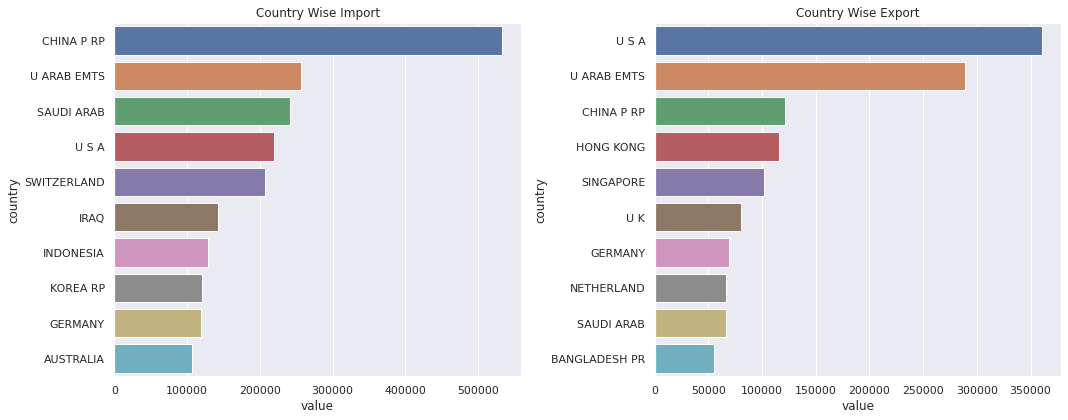

In [25]:
sns.set(rc={'figure.figsize':(15,6)})
ax1 = plt.subplot(121)
sns.barplot(df5.value,df5.index).set_title('Country Wise Import')
ax2 = plt.subplot(122)
sns.barplot(df6.value,df6.index).set_title('Country Wise Export')
plt.tight_layout()
plt.show()

In [26]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=df3.index, y=df3.value, name='Import',mode='lines+markers',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=df4.index, y=df4.value, name = 'Export',mode='lines+markers',
                         line=dict(color='royalblue', width=4)))
fig.update_layout(
    title=go.layout.Title(
        text="Yearwise Import/Export",
        xref="paper",
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(
                family="Courier New, monospace",
                size=18,
                color="#7f7f7f"
            )
        )
    )
)
fig.show()

In [27]:
df3 = data_import.groupby('Commodity').agg({'value':'sum'})
df3 = df3.sort_values(by='value', ascending = False)
df3 = df3[:10]
df4 = data_export.groupby('Commodity').agg({'value':'sum'})
df4 = df4.sort_values(by='value', ascending = False)
df4 = df4[:10]

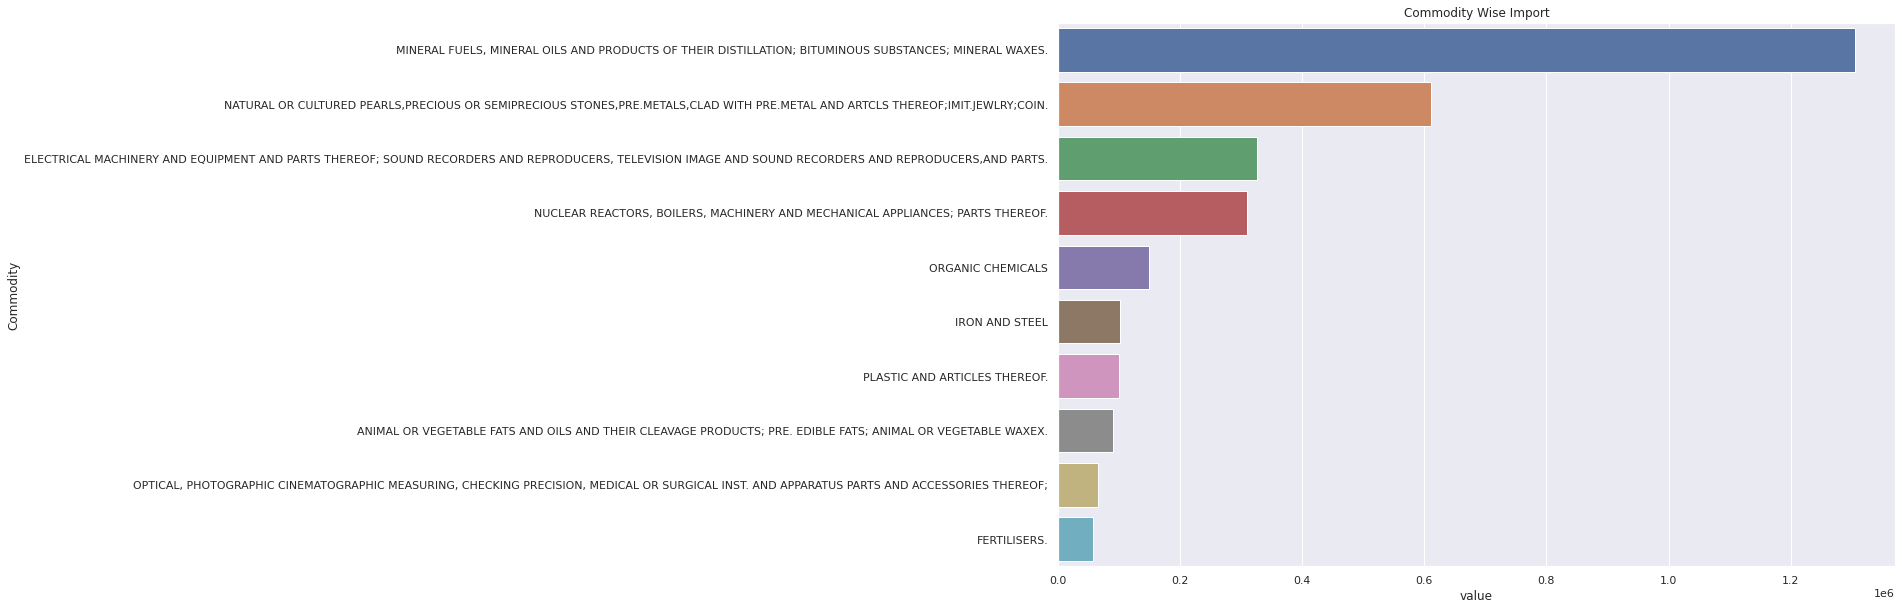

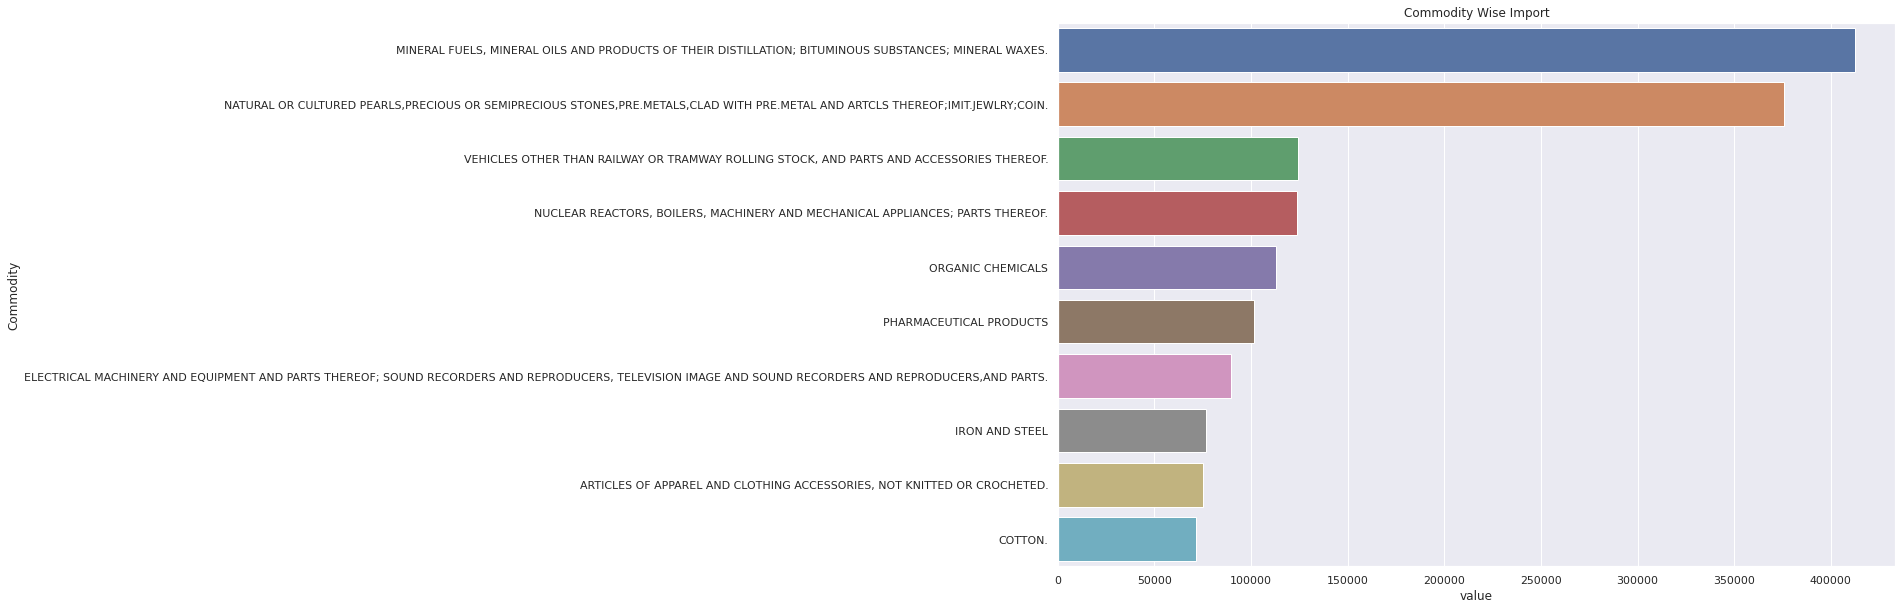

In [28]:
sns.set(rc={'figure.figsize':(15,10)})
#ax1 = plt.subplot(121)
sns.barplot(df3.value,df3.index).set_title('Commodity Wise Import')
plt.show()
#ax2 = plt.subplot(122)
sns.barplot(df4.value,df4.index).set_title('Commodity Wise Import')
plt.show()

In [29]:
expensive_import = data_import[data_import.value>1000]
expensive_import.head(10)

HSCode                                          Commodity    value  \
55        27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  1559.37   
95        27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  4012.00   
142       15  ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...  1720.46   
236       27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  9664.58   
701       71  NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...  6619.68   
942       27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  1596.79   
1215      27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  1165.81   
1414      27  MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...  1047.32   
1415      28  INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...  1050.23   
1416      29                                  ORGANIC CHEMICALS  8596.25   

         country  year  
55       ALGERIA  2018  
95        ANGOLA  2018  
142    ARGENTINA  2018  
236    AUSTRALIA  2018  
701      BELGIUM  2018  
942       BRAZIL  2018  
1215      CANADA  2018  
1414  CHINA P RP  2018  
1415  CHINA P RP  2018  
1416  CHINA P RP  2018

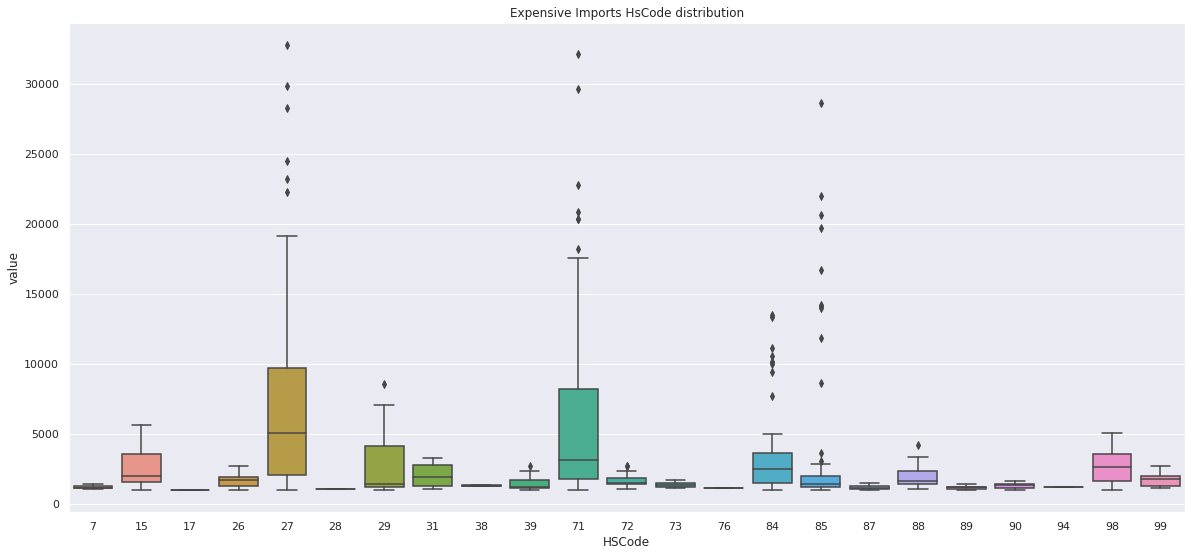

In [30]:
#fig, ax = plt.subplots(1,1,figsize=(18,6)) 
plt.figure(figsize=(20,9))
#plt.rcParams['figure.figsize']=(23,10)
#fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="HSCode", y="value", data=expensive_import).set_title('Expensive Imports HsCode distribution')
plt.show()

In [31]:
df =expensive_import.groupby(['HSCode']).agg({'value': 'sum'})
df = df.sort_values(by='value')

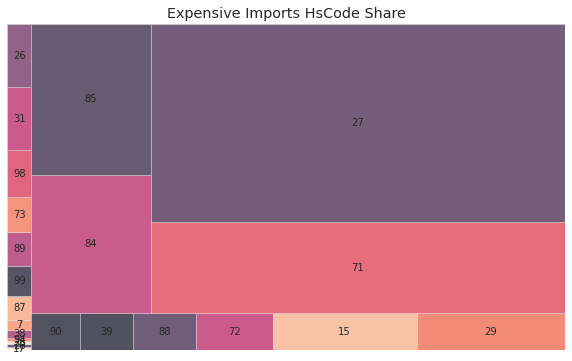

In [32]:
value=np.array(df)
commodityCode=df.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
squarify.plot(sizes=value, label=commodityCode, alpha=.7 )
plt.axis('off')
plt.title("Expensive Imports HsCode Share")
plt.show()

In [33]:
len(expensive_import['country'].unique())

49

In [34]:
df1 = expensive_import.groupby(['country']).agg({'value': 'sum'})
df1 = df1.sort_values(by='value')

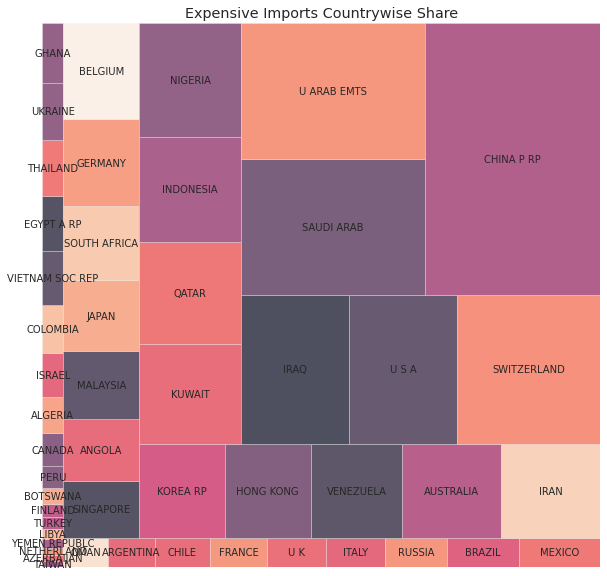

In [35]:
value=np.array(df1)
country=df1.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes=value, label=country, alpha=.7 )
plt.title("Expensive Imports Countrywise Share")
plt.axis('off')
plt.show()